## Pytorch Workflow:

In [1]:
what_were_covering = {1: 'data (preparation and loading)',
                    2: 'build a model',
                    3: 'train a model',
                    4: 'evaluate a model',
                    5: 'save and load a model',
                    6: 'put it all together',}



In [2]:
import torch
from torch import nn #nn contains all the modules needed to build a neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.1+cpu'

## 1. Preparing and loading data
Data can be almost anything.... as long as you convert it to numbers

* Excel
* Images
* Videos
* DNA
* Audio
* Text

Machine learning / deep learning consists of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula. 
We'll use a linear regression formula to make a straight line with *known* **parameters**


In [3]:
# Create *known* parameters
import torch
weight = 0.7
bias = 0.3

# Create *unknown* parameters
start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

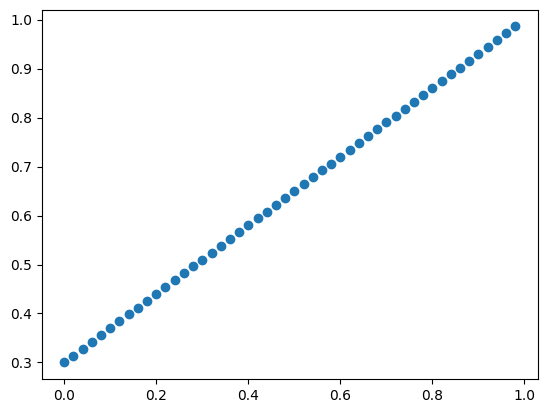

In [5]:
# Plot the data
plt.scatter(X, y, label='y')

### Splitting data into training and testing data


In [6]:
# Create a training and testing split of the data
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
# Plot the training set in blue and testing set in red

from turtle import color
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

    # Plot the training set in blue and testing set in red
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='r', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', label='Predictions')

## Building My 'First' PyTorch Model

What are model does:
1. Start with random values (weights * bias)
2. Look at training data and adjust the values to get closer the the ideal values (the weight & bias)


Does this through 2 main things:
1. Gradient Descent
2. Backpropagation 

In [8]:
from torch import nn
# Create a linear regression model

class LinearRegression(nn.Module): #nn.Module is the base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Forward Method to define the computation performed in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias #y = wx + b

### Taking a look behind the curtain to see the parameters

Now that we've created our model, let's check to see what the parameters are.

We can use `.parameters` to see the parameters of the model.

In [9]:
# Create our first model by calling the class LinearRegression
# Create a manual seed for reproducibility

import torch
torch.manual_seed(42)

# Create a model
model_0 = LinearRegression()

# Print the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()` 

Let's see how well our model works at making predictions at y_test using X_test

When we pass data through our model it will pass it through our forward method

In [11]:
#Make a prediction of the model without training
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

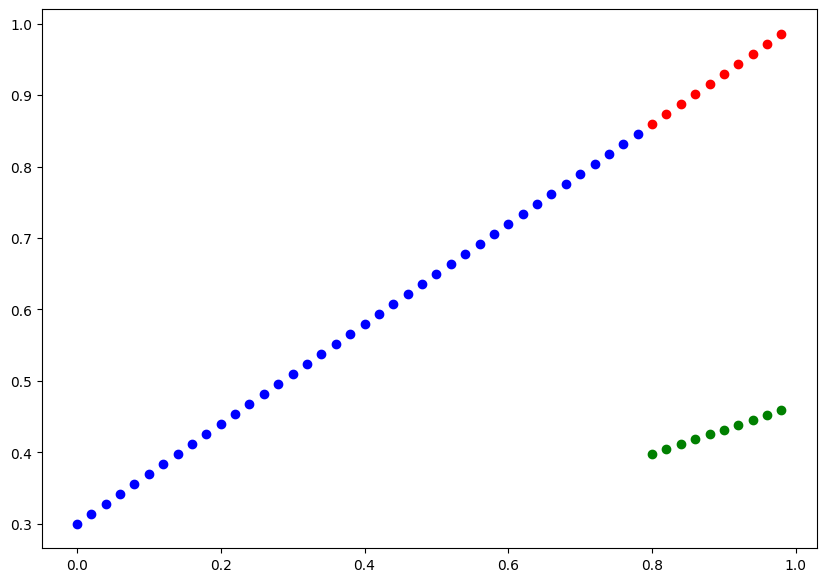

In [12]:
plot_predictions(predictions=y_preds)


In [33]:
#Set up a loss function
loss_fn =nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.AdamW(params=model_0.parameters(), lr=1e-2)

In [34]:
# Set up manual seed
torch.manual_seed(42)

# An epoch is one loop through the entire training dataset.
epochs = 100 

# Step 1: Loop through the entire training dataset.
for epoch in range(epochs):
    # Set the model to the training model
    # Sets all parameters to require gradients
    model_0.train()
    
    # Step 2: Forward pass using the forward() function
    y_preds = model_0(X_train)
    
    # Step 3: Calculate the loss using the loss function
    loss = loss_fn(y_preds, y_train)
    #print(f'Loss: {loss}')
    
    # Step 4: Calculate the zero grad
    optimizer.zero_grad()
    
    # Step 5: Loss backward - use back propagation to calculate the gradients
    loss.backward()
    
    # Step 6: Step the optimizer - attempt to optimize the weights and bias to reduce the loss
    optimizer.step() # --> By default, the optimizer changes will accumulate throughout the training loop. We have to zero them in step 3 before the next loop
    
    
    model_0.eval() # Turns off different setting in the model not needed for evaluation/ testing
    with torch.inference_mode(): # Turns off gradient tracking & a couple more things
        # 1. Do a forward pass
        


Loss: 0.027543315663933754
Loss: 0.025043707340955734
Loss: 0.023974673822522163
Loss: 0.022124864161014557
Loss: 0.019851569086313248
Loss: 0.017636984586715698
Loss: 0.015686167404055595
Loss: 0.013995444402098656
Loss: 0.0121712451800704
Loss: 0.0099942646920681
Loss: 0.008001988753676414
Loss: 0.006573179271072149
Loss: 0.004926808178424835
Loss: 0.0026033050380647182
Loss: 0.0021171369589865208
Loss: 0.0016349047655239701
Loss: 0.0019455135334283113
Loss: 0.0025187418796122074
Loss: 0.0032547651790082455
Loss: 0.0033918730914592743
Loss: 0.0033733441960066557
Loss: 0.003366909921169281
Loss: 0.003173238830640912
Loss: 0.0027339295484125614
Loss: 0.0021921731531620026
Loss: 0.0016914636362344027
Loss: 0.0008657037978991866
Loss: 0.0008072525379247963
Loss: 0.0018397241365164518
Loss: 0.0014575414825230837
Loss: 0.0017877541249617934
Loss: 0.0022657527588307858
Loss: 0.0019553862512111664
Loss: 0.002057603793218732
Loss: 0.0020335749723017216
Loss: 0.001487828092649579
Loss: 0.00128

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.2986]))])

In [ ]:
epochs = 100

for epoch in range(epochs):
    # Set the model to the training model
    model_0.train()
    y_preds = model_0(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

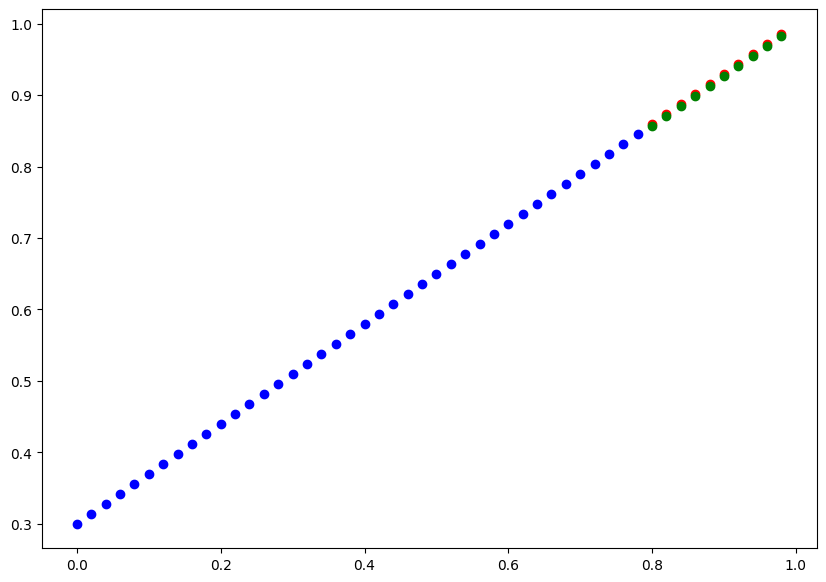

In [37]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    

plot_predictions(predictions=y_preds)